<a href="https://colab.research.google.com/github/ks787/NetflixDataAnalysis/blob/main/net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mymoviedb.csv', lineterminator='\n')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
# data type and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


data has date as object. we convert it into date and time

In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
# is any duplicate data
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Summary:
. we have df consisting of 9827 rows and 9 columns.
. dataset looks tidy with no NaNs or duplicate values.
.release date column need to be casted as date and time formate and to extract only year value.
* drop the data which are not useful.




In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [ ]:
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [ ]:
cols = ['Overview', 'Original_Language', 'Poster_Url' ]

In [ ]:
df.drop(cols, axis=1, inplace=True)

In [ ]:

df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Year'],
      dtype='object')

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


In [ ]:
def catigorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col]= pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [ ]:
labels = ['not popular', 'below avg', 'avg', 'popular']
catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below avg', 'avg', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below avg' < 'avg' < 'popular']

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War",2021


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not popular,2467
popular,2450
avg,2412
below avg,2398


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War",2021


In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [ ]:
#casting column into categories
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
 6   Release_Year  25552 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [ ]:
df.nunique()

,0
Release_Date,5846
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19
Release_Year,100


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [ ]:
#data visualization
sns.set_style('darkgrid')

In [ ]:
#most frequent gener on netflix.
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


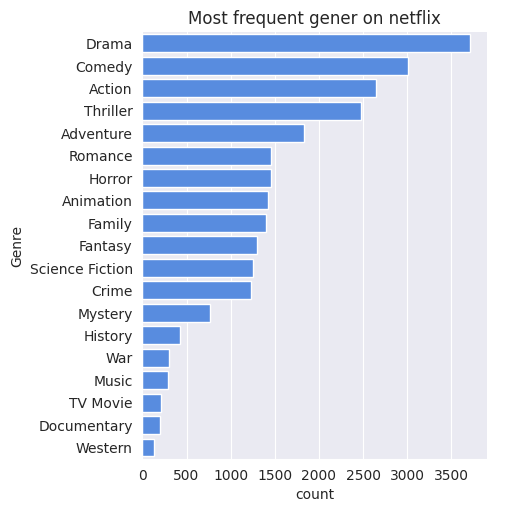

In [ ]:
sns.catplot(y='Genre', kind='count', data=df, order=df['Genre'].value_counts().index, color='#4287f5')
plt.title('Most frequent gener on netflix')
plt.show()

In [ ]:
# which has highest vote in vote avg?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


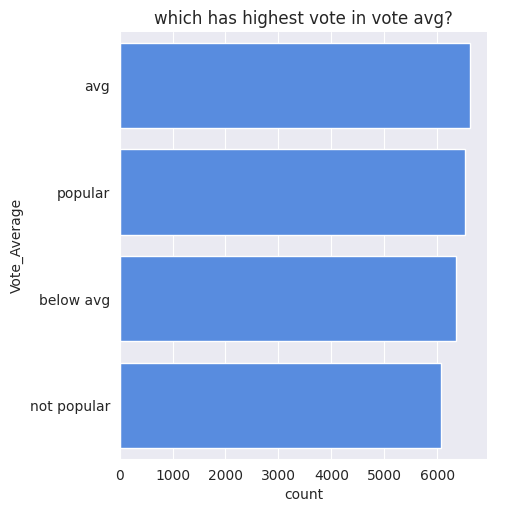

In [ ]:
sns.catplot(y='Vote_Average', kind='count', data=df, order=df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title('which has highest vote in vote avg?')
plt.show()


In [ ]:
#what movie got the highest popularity and what's its genere?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


In [ ]:
# what movie got lowest popularity and gener
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,avg,Music,2021
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,avg,Drama,2021
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,avg,History,2021
25549,1984-09-23,Threads,13.354,186,popular,War,1984
25550,1984-09-23,Threads,13.354,186,popular,Drama,1984
25551,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984


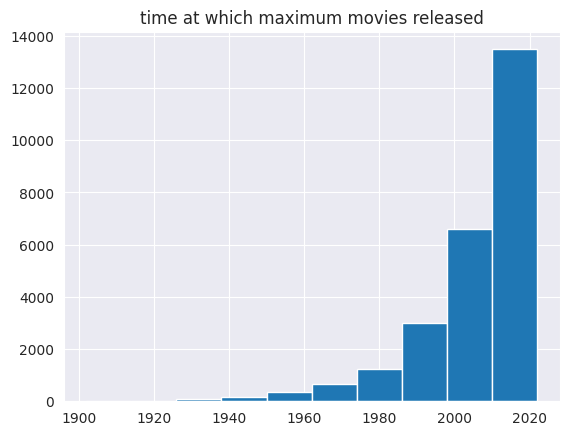

In [ ]:
#time at which maximum movies released
df['Release_Year'].hist()
plt.title('time at which maximum movies released')
plt.show()

# conclusion:
Q1: what is the most frequent gener in the dataset?
Drama  appeared 14% of times.

Q2: What gener has highest votes?
25.5% of our dataset with popular votes. Drama again gets the highest popularity among fans.

Q3:What movie got lowest popularity and gener?
The united states, thread has lowest rate and gener of music, drama, war.

Q4: What movie got highest popularity and gener?
Spider man no way home has highest popularity rate. gener: action, adventure ande science fiction.

Q5: which year has most filmmed movies?
year 2020 has highest filimed movies in our dataset.
